In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sns.set()
%matplotlib inline
csv.field_size_limit(sys.maxsize)

131072

In [13]:
raw_data = pd.read_csv('../data_files/geuvadis.normal.meta.csv')

In [14]:
total_reads =raw_data['total_spots'].sum()

In [15]:
depth_list = []


with open('../../results/geuvadis_results/merged.pileup.txt', 'rt') as csvfile:
    
    spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    
    for row in spamreader:
        
        transcript = row[0]
        pos = row[1]
        depth = row[3]
        
        print ([transcript, pos, depth])
        
        
            
        depth_list.append([transcript, pos, depth])

['Alpha_GEX_64k_HEX', '1', '1']
['Alpha_GEX_64k_HEX', '2', '1']
['Alpha_GEX_64k_HEX', '3', '1']
['Alpha_GEX_64k_HEX', '4', '1']
['Alpha_GEX_64k_HEX', '5', '1']
['Alpha_GEX_64k_HEX', '6', '1']
['Alpha_GEX_64k_HEX', '7', '1']
['Alpha_GEX_64k_HEX', '8', '1']
['Alpha_GEX_64k_HEX', '9', '1']
['Alpha_GEX_64k_HEX', '10', '1']
['Alpha_GEX_64k_HEX', '11', '1']
['Alpha_GEX_64k_HEX', '12', '1']
['Alpha_GEX_64k_HEX', '13', '1']
['Alpha_GEX_64k_HEX', '14', '1']
['Alpha_GEX_64k_HEX', '15', '1']
['Alpha_GEX_64k_HEX', '16', '2']
['Alpha_GEX_64k_HEX', '17', '2']
['Alpha_GEX_64k_HEX', '18', '2']
['Alpha_GEX_64k_HEX', '19', '2']
['Alpha_GEX_64k_HEX', '20', '2']
['Alpha_GEX_64k_HEX', '21', '2']
['Alpha_GEX_64k_HEX', '22', '2']
['Alpha_GEX_64k_HEX', '23', '2']
['Alpha_GEX_64k_HEX', '24', '2']
['Alpha_GEX_64k_HEX', '25', '2']
['Alpha_GEX_64k_HEX', '26', '2']
['Alpha_GEX_64k_HEX', '27', '2']
['Alpha_GEX_64k_HEX', '28', '3']
['Alpha_GEX_64k_HEX', '29', '6']
['Alpha_GEX_64k_HEX', '30', '7']
['Alpha_GEX_64k_HEX

In [11]:

df = pd.DataFrame(columns=['transcript', 'pos', 'depth'], data = depth_list)

df['depth'] = pd.to_numeric(df['depth'])

ValueError: Unable to parse string "C" at position 0

In [ ]:
df.head()

In [12]:
df['normalised_depth'] = df['depth'] / total_reads

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [8]:
alpha_wt_cov = df[df['transcript'] == 'Alpha_GEX_64k_HEX']
alpha_dup_cov = df[df['transcript'] == 'Alpha_GEX_79k_dup_FAM']
beta_cov = df[df['transcript'] == 'BETA_new_GEX_FAM']

Text(0.5,1,'Coverage over Reference')

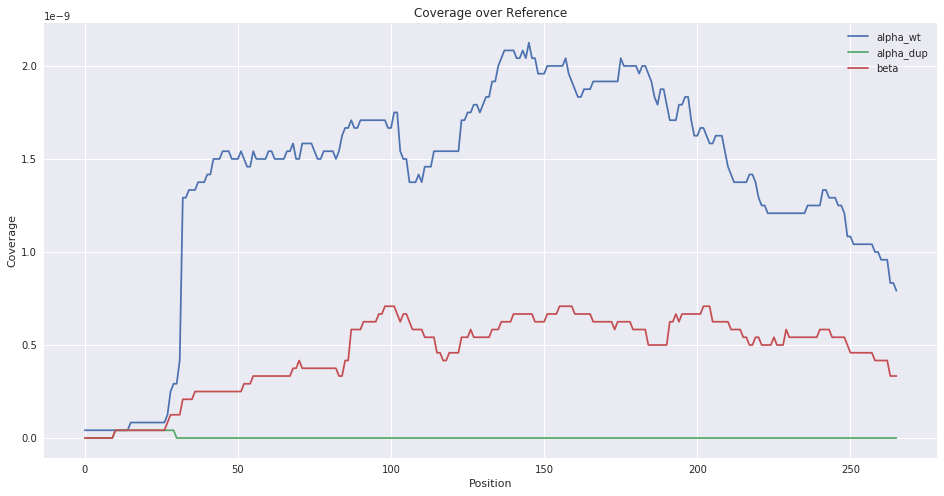

In [9]:
ax = alpha_wt_cov.plot(x='pos', y='normalised_depth', use_index=False, figsize=(16,8))
alpha_dup_cov.plot(x='pos', y='normalised_depth', ax=ax,use_index=False)
beta_cov.plot(x='pos', y='normalised_depth', ax=ax,use_index=False)

ax.legend(["alpha_wt", "alpha_dup", 'beta'])
ax.set_xlabel('Position')
ax.set_ylabel('Coverage')
ax.set_title('Coverage over Reference')